# Automatidata, NYC Taxi and Limousine Commision 
---


**Name of the project:** Automatidata.

**Data source:** NYC Taxi and Limousine Commission (New York City TLC)

**Stakeholders:** Private.

**The purpose** Find ways to generate revenue.

**Goeal** Build a **RandomForestClassifier** and attempt to predict if costumers **will not leave tip.**


**Ethical Considerations**

0. What is the name of the project?

    Automatidata, NYC Taxi and Limousine Commision project.
    
1. What are you being asked to do?

    **The purpose** is to find ways to generate revenue, and 
    **Goal** is to build a RandomForestClassifier and attempt to predict if costumers **will not leave tip.**
    
2. What are the ethical implications of the model? 

    FN & FP:
    The model could uncorrectly classify tippers as not tippers and or not tippers for tippers.
    Frustrations could increase as missunderstandings arise.
    
3. What are the consequences of your model making errors?

    Missinformation.

4. What are the risks of using the model?

    Act with predisposition towards and outcome and obtaining the oposite result.
    
    Drivers who didn't receive tips will probably be upset that the app told them a customer would leave a tip. If it happened often, drivers might not trust the app. Drivers are unlikely to pick up people who are predicted to not leave tips. Customers will have difficulty finding a taxi that will pick them up, and might get angry at the taxi company. Even when the model is correct, people who can't afford to tip will find it more difficult to get taxis, which limits the accessibility of taxi service to those who pay extra.
  
5. Do the benefits of such a model outweigh the potential problems?

    Overall, no. No one would like to be classify as a bad tipper.

6. Would you proceed with the request to build this model? Why or why not?

    In this case, yes, as is an exercise, but in real life could be problematic.

7. Can the objective be modified to make it less problematic?

    Yes, we could predict generous. No exclussion, meaning only  let you know good tippers.

8. Who are the stakeholders involved in the project?

    NYC Taxi and Limousine Commission (New York City TLC)

9. How will the model be used?

    It will be used to predict generousity. Tippers that tip over 20%

10. Is the data used representative of the population in which is intented to be used
    
    Yes, it is intended to used in the same or similar group.

11. Is the model accountable?

    Yes.

12. Is this model subject to human oversight?

    Not at the moment, but could be and is recommended.



### Plan, Analyze, Construct and Execute.

Most of the EDA was done in earlier work, is listed at the end of this cell with links to the notebooks, but still some work to do. here a plan:

 - EDA.
    - Break down data into data types and act accordingly. Example, locations are categorical nominal and should be one hot encoded.
    - Identify **outliers**...
        - Tree models dont have the same assumptions than linear models.
        - Stochastic models like Random Forest, are often used when the data is noisy or when the underlying problem is inherently stochastic. This is because stochastic models are more robust to noise and can better capture the uncertainty in the data, therefore normallity and linearity are not in the assumtions.
 - Model building and evaluation.
    - Pre-process.Not in particular order.
        - Classify features into the data type.
        - Split data into independent and dependent variables.
        - One hot encode, what need to be transformed.
        - Other data Transformations.
        - Split into train and test
        - RandomForestClassifier()
        - **Train model**, use model with train data, make predictions with test data
        - Analyze, accuracy, precision, recall, f1.
        - **Test model**, calculate same metrics with test data.
        - Write paragraph comparing the model train and test.
        - Observe importance in features.
    
 - Interpreting results.


# Update when the time comes.
#### Related older notebooks: 

[Initial inspection](https://github.com/marioymario/GDAPC/blob/main/Python/project/Activity_Course%202%20Automatidata%20project%20lab.ipynb)

[EDA](https://github.com/marioymario/GDAPC/blob/main/DataIntoInsight/EDA/TLC_NYC_2017.ipynb)
   
[A/B test](https://github.com/marioymario/GDAPC/blob/main/Statistics/ABTest/TLC_NYC_2017_STATS.ipynb)

[Linear Regression](https://github.com/marioymario/GDAPC/blob/main/RegressionAnalysis/project/automatidata/AutomatidataProject.ipynb)


I also used this module:

https://pypi.org/project/gatoeda65/


In [32]:
## personal functions module
##
import exploratory_data_analysis.eda_functions as eda
## Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

from sklearn.model_selection import GridSearchCV, train_test_split, PredefinedSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, RocCurveDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance
from xgboost import plot_importance

import pickle
import scipy
from scipy import stats

import warnings as cuidado
cuidado.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [33]:
## Functions:

def str_encoder(dataframe, str_to_encode):
    """
    The str_encoder function will convert columns with
    labels strings datatype to numerical ordinal or binary numerical
    columns and then return a new DataFrame with the transformed columns
    plus the original columns that were not transformed.

    Arguments:
        df: A Pandas Data frame.
        str_to_encode: a list of columns to tranform
        from the same data set.
    Returns:
        A new data set made of the transformed columns
        plus the original with out the previously transformed
        data.
    """
    ## make a copy
    df_original = dataframe.copy()
    df_to_encode = df_original[str_to_encode].copy()

    le = LabelEncoder()
    str_encoded = df_to_encode.apply(le.fit_transform)

    ## Drop strings categories
    df_o_e = df_original.drop(str_to_encode, axis=1)

    ## Add transformed data
    full = pd.DataFrame()
    full = df_o_e.join(str_encoded)

    return full

def observe_data_type(df: pd.DataFrame, max_class):

    """
    Args:
        df(pd.DataFrame): a pdDataFrame.
        max_class: max number to be considered a categorical feature.
        Each case is different and EDA will tell, and this is a helper
        function to do that.

    Returns:
        A new dataset with information related to unique values
        per column

    """
    # Running validation on the argument recieved
    assert type(df) == pd.DataFrame, f'{df}, is not a pandas df.'
    num_uniques = []
    column_name = []
    check = []
    resu = {}
    result = pd.DataFrame({})

    for c in df.columns:

        num_uniques.append(len(df[c].unique()))
        column_name.append(c)
        if 2 < len(df[c].unique()) < max_class:
            check.append('yes')
        else: check.append('no')


    result['columns_name'] = column_name
    result['Num_uniques'] = num_uniques
    result['possible_categorical'] = check
    return(result)

def hot_encoder(dataframe, ordinal_to_hot_encode):

    """
    The hot_encoder function will convert the ordinal_to_hot_encode
    columns from numerical ordinal and then return a new DataFrame
    with the transformed columns plus the original columns that were not transformed.

    Arguments:
        df: A Pandas Data frame.
        str_to_encode: a list of columns to tranform
        from the same data set.
    Returns:
        A new data set made of the transformed columns
        plus the original with out the previously transformed
        data.
    """
    ## Original set
    original = dataframe.copy()

    ## Set minus the Transformed columns
    nums = original.drop(ordinal_to_hot_encode, axis=1)

    ## Transfomr to str
    str_encoded = original[ordinal_to_hot_encode].astype(str)

    ## Using get_dummies
    encoded_set = pd.get_dummies(str_encoded, dtype=int)

    ## Using join with the nums data set and encoded_set
    full = nums.join(encoded_set)

    return full

def get_categories(dataframe, categorical_columns):
    
    original = dataframe.copy()
    ## Gets the categories.
    categories = [original[i].unique().astype(str) for i in categorical_columns]
    ## update categories to remove duplicates
    categories = [list(set(cat)) for cat in categories]

    
## Time transformations functions  

def daytime(hour):
    if 10 <= hour['daytime'] < 16:
        val = 1
    else:
        val = 0
    return val
def pm_rush(hour):
    if 16 <= hour['pm_rush'] < 20:
        val = 1
    else:
        val = 0
    return val

# Define 'nighttime()' conversion function [20:00–06:00)
def nighttime(hour):
    if 20 <= hour['nighttime'] < 24:
        val = 1
    elif 0 <= hour['nighttime'] < 6:
        val = 1
    else:
        val = 0
    return val


In [34]:

## Location of the data file
location ='2017_Yellow_Taxi_Trip_Data.csv'

In [35]:
## Defining the pandas data frame,
data = pd.read_csv(location)

## and the predictions with means from the regression notebook
nyc_preds_means = pd.read_csv('nyc_preds_means.csv')

## Merge datasets
df = data.merge(nyc_preds_means,
                how='left',
                left_index=True,
                right_index=True)

## Selecting customers that pay with Credit card.
df0 = df[df['payment_type'] == 1]
df0.head()


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.372866
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.002069
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.046202
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731127
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,11.855376,2.052258,10.370075


In [36]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15265 entries, 0 to 22698
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15265 non-null  int64  
 1   VendorID               15265 non-null  int64  
 2   tpep_pickup_datetime   15265 non-null  object 
 3   tpep_dropoff_datetime  15265 non-null  object 
 4   passenger_count        15265 non-null  int64  
 5   trip_distance          15265 non-null  float64
 6   RatecodeID             15265 non-null  int64  
 7   store_and_fwd_flag     15265 non-null  object 
 8   PULocationID           15265 non-null  int64  
 9   DOLocationID           15265 non-null  int64  
 10  payment_type           15265 non-null  int64  
 11  fare_amount            15265 non-null  float64
 12  extra                  15265 non-null  float64
 13  mta_tax                15265 non-null  float64
 14  tip_amount             15265 non-null  float64
 15  to

In [37]:
##Creating the 'pct' column, that is the percentage tip,
df0['pct'] = ( df0['tip_amount'] / (df0['total_amount'] - df0['tip_amount'] ) ) * 100
threshold = 19 ## 20%

## and the binary class for generous over 20%
df0['generous'] = df0['pct'].gt(threshold).astype(int)
## gt(threshold).astype(int) returns nans for zeors so filling in values nans with zeros.
df0['pct'] = df0['pct'].fillna(0)

Date and time transformations:

`am_rush` = [06:00&ndash;10:00)  
`daytime` = [10:00&ndash;16:00)  
`pm_rush` = [16:00&ndash;20:00)  
`nighttime` = [20:00&ndash;06:00)  

In [38]:
## Here we:
## Create day column
## Create time of day
## and create Month column

## Convert pickup and dropoff cols to datetime
df0['tpep_pickup_datetime'] = pd.to_datetime(df0['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df0['tpep_dropoff_datetime'] = pd.to_datetime(df0['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

## Create a 'day' col
df0['day'] = df0['tpep_pickup_datetime'].dt.day_name().str.lower()

## Create 'am_rush' col
df0['am_rush'] = df0['tpep_pickup_datetime'].dt.hour

## Create 'daytime' col
df0['daytime'] = df0['tpep_pickup_datetime'].dt.hour

## Create 'pm_rush' col
df0['pm_rush'] = df0['tpep_pickup_datetime'].dt.hour

## Create 'nighttime' col
df0['nighttime'] = df0['tpep_pickup_datetime'].dt.hour

## month column
# Create 'month' col
df0['month'] = df0['tpep_pickup_datetime'].dt.strftime('%b').str.lower()


In [39]:
## Apply 'nighttime' function to the 'nighttime' series
df0['nighttime'] = df0.apply(nighttime, axis=1)

## Apply 'daytime' function to the 'daytime' series
df0['daytime'] = df0.apply(daytime, axis=1)

## Apply 'pm_rush' function to the 'pm_rush' series
df0['pm_rush'] = df0.apply(pm_rush, axis=1)

In [40]:
df0.head(20)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,pct,generous,day,am_rush,daytime,pm_rush,nighttime,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.00,0.0,0.5,2.76,0.00,0.3,16.56,22.847222,3.521667,16.372866,20.000000,1,saturday,8,0,0,0,mar
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.00,0.0,0.5,4.00,0.00,0.3,20.80,24.470370,3.108889,16.002069,23.809524,1,tuesday,14,1,0,0,apr
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.50,0.0,0.5,1.45,0.00,0.3,8.75,7.250000,0.881429,7.046202,19.863014,1,friday,7,0,0,0,dec
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.50,0.0,0.5,6.39,0.00,0.3,27.69,30.250000,3.700000,18.731127,30.000000,1,sunday,13,1,0,0,may
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.00,0.5,0.5,2.06,0.00,0.3,12.36,11.855376,2.052258,10.370075,20.000000,1,saturday,20,0,0,1,mar
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,1,47.50,1.0,0.5,9.86,0.00,0.3,59.16,59.633333,12.830000,45.505320,20.000000,1,wednesday,19,0,1,0,may
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,1,16.00,1.0,0.5,1.78,0.00,0.3,19.58,26.437500,4.022500,18.616222,10.000000,0,tuesday,17,0,1,0,aug
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,1,13.00,0.0,0.5,2.75,0.00,0.3,16.55,10.541111,1.580000,9.063097,19.927536,1,friday,15,1,0,0,nov
10,18017909,2,2017-03-04 11:58:00,2017-03-04 12:13:12,1,1.77,1,N,162,142,1,11.50,0.0,0.5,2.46,0.00,0.3,14.76,14.178333,1.641000,10.133579,20.000000,1,saturday,11,1,0,0,mar
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.00,0.0,0.5,14.58,5.54,0.3,72.92,40.500000,19.211667,52.000000,24.991430,1,sunday,19,0,1,0,mar


#### Drop columns

Drop redundant and irrelevant columns as well as those that would not be available when the model is deployed. This includes information like payment type, trip distance, tip amount, tip percentage, total amount, toll amount, etc. The target variable (`generous`) must remain in the data because it will get isolated as the `y` data for modeling.

In [41]:
# Drop columns
drop_cols = ['Unnamed: 0', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
             'payment_type', 'trip_distance', 'store_and_fwd_flag', 'payment_type',
             'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
             'improvement_surcharge', 'total_amount', 'pct']

In [42]:
## Dropping columns that are unecesary for the task.
df0.drop(columns=drop_cols, inplace=True, axis=1)

In [43]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15265 entries, 0 to 22698
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         15265 non-null  int64  
 1   passenger_count  15265 non-null  int64  
 2   RatecodeID       15265 non-null  int64  
 3   PULocationID     15265 non-null  int64  
 4   DOLocationID     15265 non-null  int64  
 5   mean_duration    15265 non-null  float64
 6   mean_distance    15265 non-null  float64
 7   predicted_fare   15265 non-null  float64
 8   generous         15265 non-null  int64  
 9   day              15265 non-null  object 
 10  am_rush          15265 non-null  int64  
 11  daytime          15265 non-null  int64  
 12  pm_rush          15265 non-null  int64  
 13  nighttime        15265 non-null  int64  
 14  month            15265 non-null  object 
dtypes: float64(3), int64(10), object(2)
memory usage: 1.9+ MB


## Notes,
As the model to use is stochastic, the assumptions for the data are not the same as a linear model.
The following work is having that in mind.

1. Change obj to numerical
2. Column selection:

    categorical:
    - Binary
    - Ordinal
    - Nominal variables locations.
    
    
    Numerical
    
I will end up with lots of columns.
Using dimensionality reduction (PCA), could be an option.
The location have lots of information that the model can use.
Does not make sence to me to not not one hot encode.

In [44]:
## 1. Define list of cols to convert to string
cols_to_str = ['RatecodeID', 'PULocationID', 'DOLocationID', 'VendorID']

## 2. Convert each column to string
for col in cols_to_str:
    df0[col] = df0[col].astype('str')

In [45]:
# Convert categoricals to binary
df1 = pd.get_dummies(df0, drop_first=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15265 entries, 0 to 22698
Columns: 347 entries, passenger_count to month_sep
dtypes: float64(3), int64(6), uint8(338)
memory usage: 6.1 MB


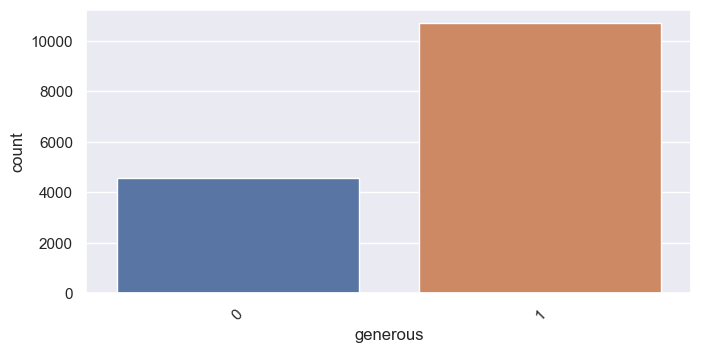

1    10704
0     4561
Name: generous, dtype: int64


In [46]:
## Observing distributions respective generous and not generous
## generous means that you tipped more than 20% of the fareAmnt.

plt.figure(figsize = (8.48,5))
sns.countplot(x=df1['generous'])
plt.xticks(rotation=45)
plt.tight_layout(pad=5.0)
plt.show()
df1['generous'].value_counts()

print(df1['generous'].value_counts())

In [29]:
df1.head()

,passenger_count,mean_duration,mean_distance,predicted_fare,generous,am_rush,daytime,pm_rush,nighttime,VendorID_2,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,RatecodeID_99,PULocationID_10,PULocationID_100,PULocationID_106,PULocationID_107,PULocationID_112,PULocationID_113,PULocationID_114,PULocationID_116,PULocationID_12,PULocationID_123,PULocationID_125,PULocationID_127,PULocationID_128,PULocationID_129,PULocationID_13,PULocationID_130,PULocationID_131,PULocationID_132,PULocationID_133,PULocationID_134,PULocationID_135,PULocationID_137,PULocationID_138,PULocationID_140,PULocationID_141,PULocationID_142,PULocationID_143,PULocationID_144,PULocationID_145,PULocationID_146,PULocationID_148,PULocationID_151,PULocationID_152,PULocationID_153,PULocationID_158,PULocationID_161,PULocationID_162,PULocationID_163,PULocationID_164,PULocationID_166,PULocationID_17,PULocationID_170,PULocationID_173,PULocationID_179,PULocationID_181,PULocationID_186,PULocationID_188,PULocationID_189,PULocationID_190,PULocationID_193,PULocationID_196,PULocationID_208,PULocationID_209,PULocationID_211,PULocationID_213,PULocationID_216,PULocationID_218,PULocationID_223,PULocationID_224,PULocationID_225,PULocationID_226,PULocationID_229,PULocationID_230,PULocationID_231,PULocationID_232,PULocationID_233,PULocationID_234,PULocationID_236,PULocationID_237,PULocationID_238,PULocationID_239,PULocationID_24,PULocationID_243,PULocationID_244,PULocationID_246,PULocationID_247,PULocationID_249,PULocationID_25,PULocationID_255,PULocationID_256,PULocationID_258,PULocationID_260,PULocationID_261,PULocationID_262,PULocationID_263,PULocationID_264,PULocationID_265,PULocationID_28,PULocationID_33,PULocationID_35,PULocationID_36,PULocationID_37,PULocationID_4,PULocationID_40,PULocationID_41,PULocationID_42,PULocationID_43,PULocationID_45,PULocationID_48,PULocationID_49,PULocationID_50,PULocationID_52,PULocationID_57,PULocationID_61,PULocationID_62,PULocationID_65,PULocationID_66,PULocationID_68,PULocationID_7,PULocationID_70,PULocationID_74,PULocationID_75,PULocationID_79,PULocationID_80,PULocationID_82,PULocationID_87,PULocationID_88,PULocationID_90,PULocationID_91,PULocationID_92,PULocationID_93,PULocationID_95,PULocationID_97,DOLocationID_10,DOLocationID_100,DOLocationID_102,DOLocationID_106,DOLocationID_107,DOLocationID_11,DOLocationID_112,DOLocationID_113,DOLocationID_114,DOLocationID_116,DOLocationID_117,DOLocationID_118,DOLocationID_119,DOLocationID_12,DOLocationID_120,DOLocationID_121,DOLocationID_123,DOLocationID_124,DOLocationID_125,DOLocationID_126,DOLocationID_127,DOLocationID_129,DOLocationID_13,DOLocationID_130,DOLocationID_131,DOLocationID_132,DOLocationID_133,DOLocationID_134,DOLocationID_135,DOLocationID_136,DOLocationID_137,DOLocationID_138,DOLocationID_14,DOLocationID_140,DOLocationID_141,DOLocationID_142,DOLocationID_143,DOLocationID_144,DOLocationID_145,DOLocationID_146,DOLocationID_147,DOLocationID_148,DOLocationID_15,DOLocationID_151,DOLocationID_152,DOLocationID_153,DOLocationID_157,DOLocationID_158,DOLocationID_159,DOLocationID_16,DOLocationID_160,DOLocationID_161,DOLocationID_162,DOLocationID_163,DOLocationID_164,DOLocationID_166,DOLocationID_168,DOLocationID_169,DOLocationID_17,DOLocationID_170,DOLocationID_173,DOLocationID_174,DOLocationID_175,DOLocationID_177,DOLocationID_178,DOLocationID_179,DOLocationID_180,DOLocationID_181,DOLocationID_182,DOLocationID_183,DOLocationID_186,DOLocationID_188,DOLocationID_189,DOLocationID_19,DOLocationID_192,DOLocationID_193,DOLocationID_194,DOLocationID_195,DOLocationID_196,DOLocationID_197,DOLocationID_198,DOLocationID_200,DOLocationID_202,DOLocationID_208,DOLocationID_209,DOLocationID_21,DOLocationID_210,DOLocationID_211,DOLocationID_212,DOLocationID_213,DOLocationID_216,DOLocationID_217,DOLocationID_218,DOLocationID_22,DOLocationID_220,DOLocationID_223,DOLocationID_224,DOLocationID_225,DOLocationID_226,DOLocationID_228,DOLocationID_229,DOLocationID_23,DOLocationID_230,DOLocationID_231,DOLocationID_232,

In [49]:
print(len(df1.columns))

347


In [50]:
## target we keep as is
y = df1['generous']
X = df1.drop('generous', axis=1)

In [51]:
X.shape, y.shape

((15265, 346), (15265,))

In [52]:
# Split into train and test #validation, 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


In [63]:
## Some parameters to check with Grid Search
param_grid = {
    'n_estimators': [10, 100, 1000],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'random_state': [42]
}

## Define Scores:
scoring = ['accuracy', 'precision', 'recall', 'f1']

## train, validation, and test
#split_index = [0 if x in X_val.index else -1 for x in X_train.index]
#custom_split = PredefinedSplit(split_index)

rf = RandomForestClassifier()
rf_gs = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='f1')

In [64]:
%%time

rf_gs.fit(X_train, y_train)

CPU times: user 40.3 s, sys: 19.7 ms, total: 40.3 s
Wall time: 40.3 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 50], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.5, 1],
                         'min_samples_split': [0.001, 0.01],
                         'n_estimators': [50, 100]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [68]:
# Pickle the model


def write_pickle(path, model_object, save_name:str):
    '''
    save_name is a string.
    '''
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)
        
def read_pickle(path, saved_model_name:str):
    '''
    saved_model_name is a string.
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model
    
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Return a plot of confusion matrix for predictions on y data.
    ''' 
  
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_,
                                 )
  
    disp.plot(values_format='') # `values_format=''` suppresses scientific notation
    plt.show()
    


In [65]:
#path = '/home/scicat/Downloads/coursera/automatidata/MLDS/'
#write_pickle(path, rf_gs, 'RF_GS002')

In [83]:
rf_gs.best_score_

0.8257680592105611

In [84]:
rf_gs.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 50}

In [107]:
pred = rf_gs.predict(X_test)

In [108]:
results = make_results('RF CV', rf_gs, 'f1')
results

,model,precision,recall,F1,accuracy
0,RF CV,0.703241,1.0,0.825768,0.703267


For this project, we'll use several models to predict on the test data. 
The benefit of using multiple models to predict on the test data is that we can compare models using data that was not used to train/tune hyperparameters. 

This reduces the risk of selecting a model based on how well it fit the training data.

The drawback of using the final test data to select a model is that, by using the unseen data to make a decision about which model to use, you no longer have a truly unbiased idea of how your model would be expected to perform on new data. In this case, think of final model selection as another way of "tuning" your model.

1. The `get_test_scores()` generate the scores on the test data. 
1.5. Assign the results to `rf_test_scores`.
2. Call `rf_test_scores` to output the results.

In [73]:
## Get scores on test data
preds = rf_gs.best_estimator_.predict(X_test)

In [109]:
## Get scores on test data
rf_test_scores = get_test_scores('RF test', preds, y_test)
results = pd.concat([results, rf_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.703241,1.000000,0.825768,0.703267
0,RF test,0.696292,0.997739,0.820195,0.695834


In [76]:
## Trying XgBoost:
## 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

## 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,5,6,7,8], 
             'min_child_weight': [1,2,3,4,5],
             'learning_rate': [0.1, 0.2, 0.3],
             'n_estimators': [75, 100, 125]
             }  

# 3. Define a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# 4. Instantiate the GridSearchCV object
xgb1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='f1')

In [110]:
%%time

xgb1.fit(X_train, y_train)

CPU times: user 4h 55min 42s, sys: 1min 32s, total: 4h 57min 14s
Wall time: 25min 46s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_child_weight': [1, 2, 3, 4, 5],
                         'n_estimators': [75, 100, 125]},
             refit='f1', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [111]:
## Best score and best parameters
bs = xgb1.best_score_
parametros = xgb1.best_params_

In [112]:
## Calling 'make_results()' on the GridSearch object
xgb1_cv_results = make_results('XGB CV', xgb1, 'f1')
results = pd.concat([results, xgb1_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.703241,1.000000,0.825768,0.703267
0,RF test,0.696292,0.997739,0.820195,0.695834
0,XGB CV,0.703562,0.996522,0.824800,0.702306


In [113]:
## Getting scores on test data
preds = xgb1.best_estimator_.predict(X_test)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

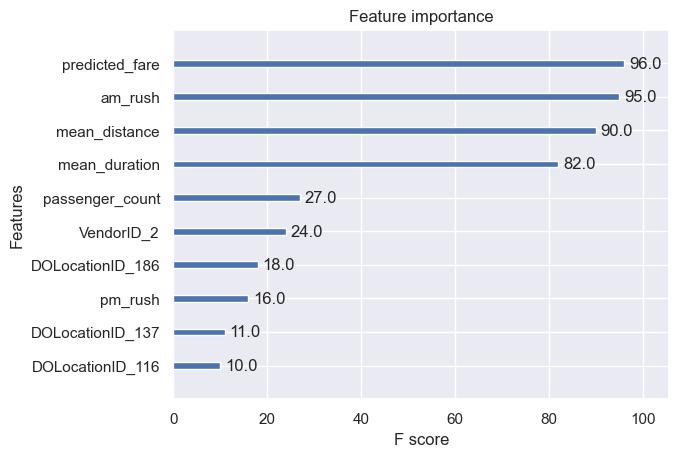

In [114]:
plot_importance(xgb1.best_estimator_, max_num_features=10)

###### XGB test results

1. Use the `get_test_scores()` function to generate the scores on the test data. Assign the results to `xgb_test_scores`.
2. Call `xgb_test_scores` to output the results.

In [115]:
# Get scores on test data
xgb_test_scores = get_test_scores('XGB test', preds, y_test)
results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.703241,1.000000,0.825768,0.703267
0,RF test,0.696292,0.997739,0.820195,0.695834
0,XGB CV,0.703562,0.996522,0.824800,0.702306
0,XGB test,0.696292,0.997739,0.820195,0.695834


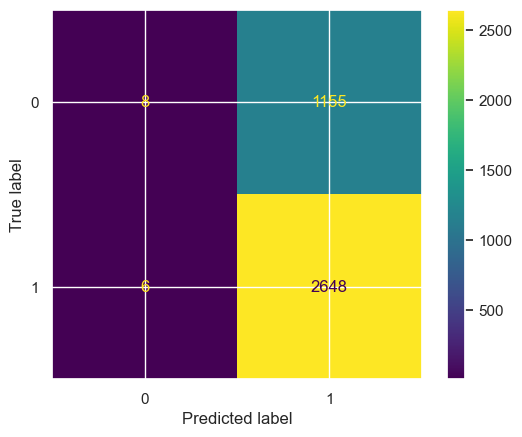

In [116]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, preds, labels=xgb1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=xgb1.classes_)
disp.plot();

#### The model XGB has predicted high level of FP comparative with FN
#### Under this model the drivers will be surpriced expecting a bad tip and getting a 
#### not a bad tip. However the model still needs further exploration.1


This is not a great model, but depending on how it's used it could still be useful. 

If the objective is only to help give taxi drivers a better idea of whether someone will leave a good tip, then it could be useful. It may be worthwhile to test it with a select group of taxi drivers to get feedback.

XGBoost is not the most transparent machine learning algorithm. We know that `predicted_fare`, `mean_duration`, and `mean_distance` are the most important features, but we don't know how they influence tipping. This would require further exploration

It would probably be very helpful to have past tipping behavior for each customer. It would also be valuable to have accurate tip values for customers who pay with cash.
It would be helpful to have a lot more data. With enough data, we could create a unique feature for each pickup/dropoff combination.